# Data Modelling - Student Grade Prediction

#### Group Members
#### Wahaj Raza CS-21055
#### Farrukh Niaz CS-21064
#### Huzaifa Naseer Khan CS-21067

#### Import libraries

In [7]:
import sys
import scipy
import numpy
import pandas
import random

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import itertools
import datetime
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
get_ipython().run_line_magic('matplotlib', 'inline')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn import model_selection, preprocessing, linear_model
from sklearn import neighbors
from sklearn import ensemble
from sklearn import svm
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

## Plot Styling and Configurations
plt.style.context('seaborn-talk')
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': '16',
          'figure.figsize': (15, 5),
         'axes.labelsize': '20',
         'axes.titlesize':'30',
         'xtick.labelsize':'15',
         'ytick.labelsize':'15'}
plt.rcParams.update(params)
plt.rcParams['text.color'] = '#A04000'
plt.rcParams['xtick.color'] = '#283747'
plt.rcParams['ytick.color'] = '#808000'
plt.rcParams['axes.labelcolor'] = '#283747'

In [8]:
df = pd.read_csv('Data.csv')
df.head()

,Gender,Nationality,Class Level,Age,School Type,Main Administration,Candidacy type,Degree
0,female,Saudi,3,21,Governmental,Riyadh,Self-Candidacy,593
1,male,Saudi,3,20,Governmental,Unknown,Self-Candidacy,600
2,female,Saudi,3,19,Governmental,Aseer,Self-Candidacy,640
3,male,Saudi,3,19,Governmental,Jazan,Self-Candidacy,600
4,female,Saudi,3,19,Governmental,Eastern,Talented-Candidacy,713


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38930 entries, 0 to 38929
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               38930 non-null  object
 1   Nationality          38930 non-null  object
 2   Class Level          38930 non-null  int64 
 3   Age                  38930 non-null  int64 
 4   School Type          38930 non-null  object
 5   Main Administration  38930 non-null  object
 6   Candidacy type       38930 non-null  object
 7   Degree               38930 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.4+ MB


In [10]:
### numerical 
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

### categorical
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['Class Level', 'Age', 'Degree']

['Gender',
 'Nationality',
 'School Type',
 'Main Administration',
 'Candidacy type']

### List of Categorical Columns

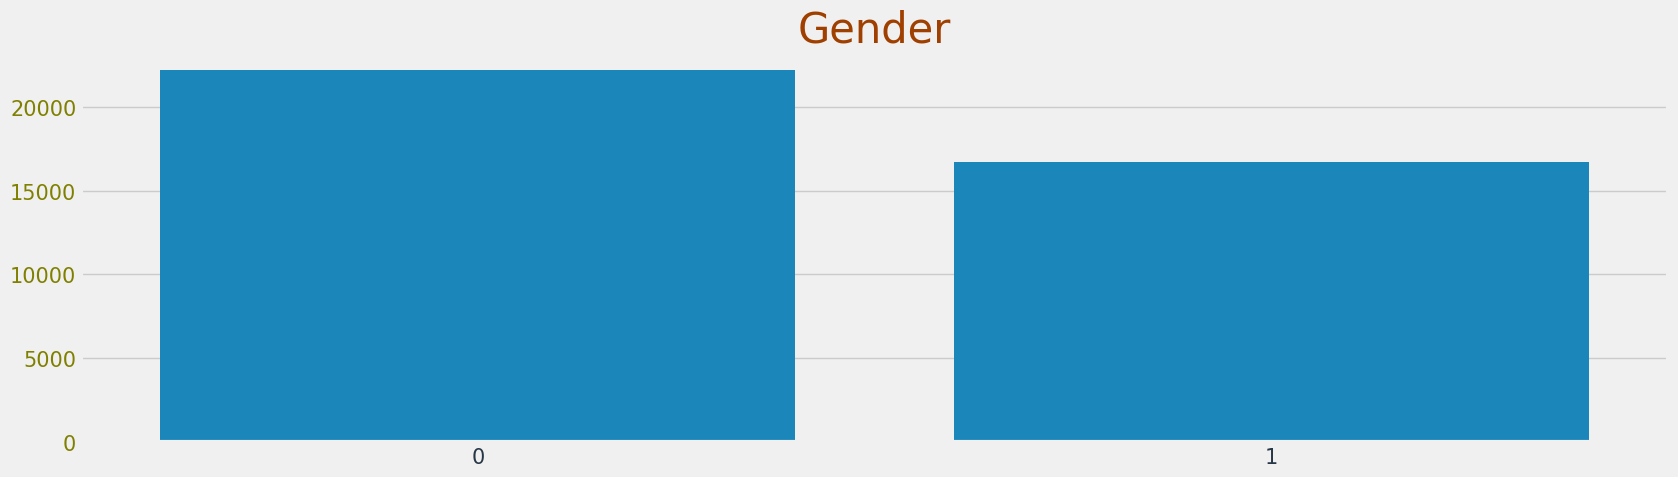

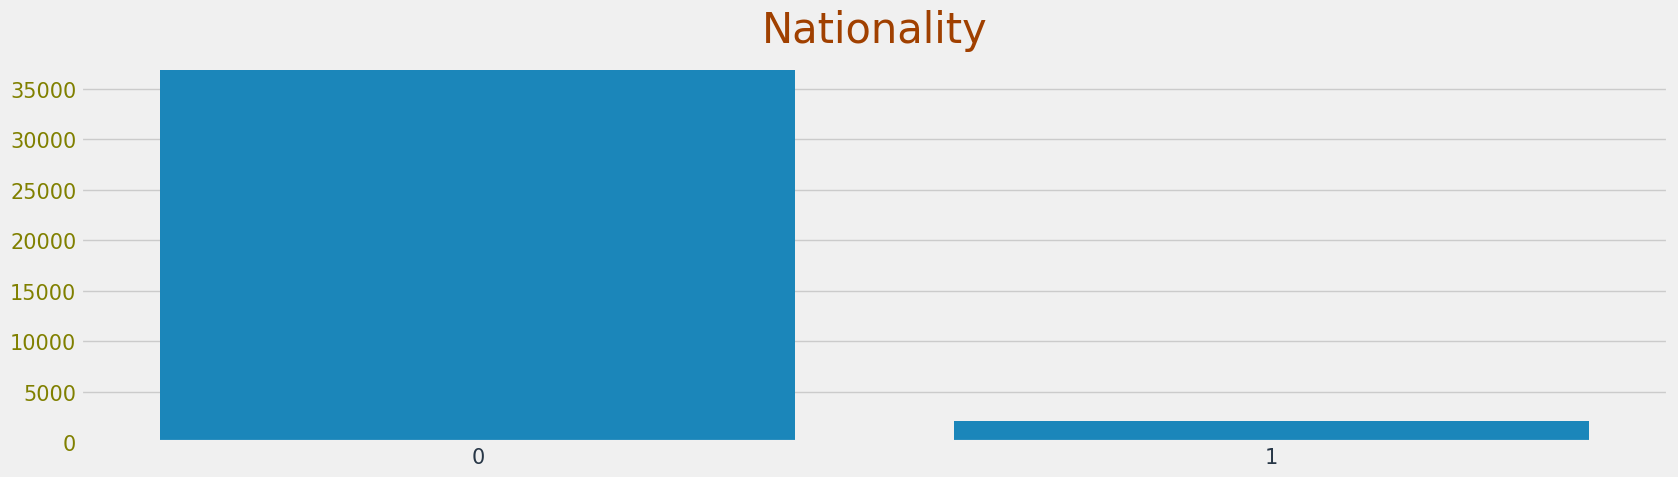

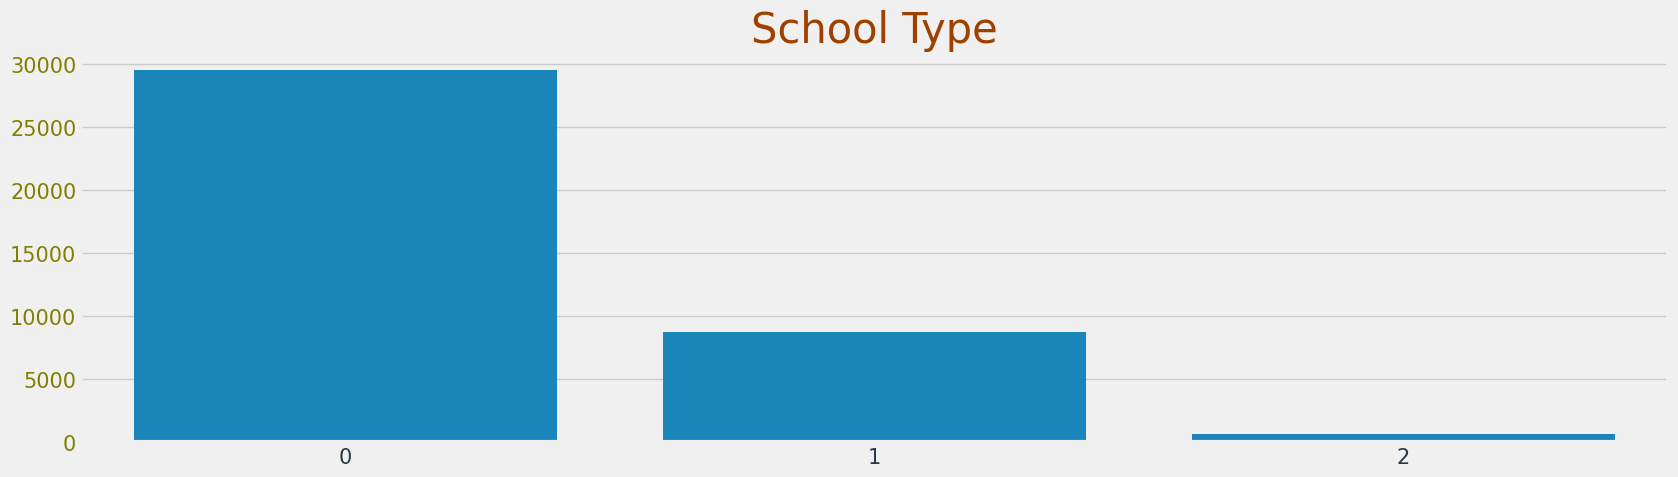

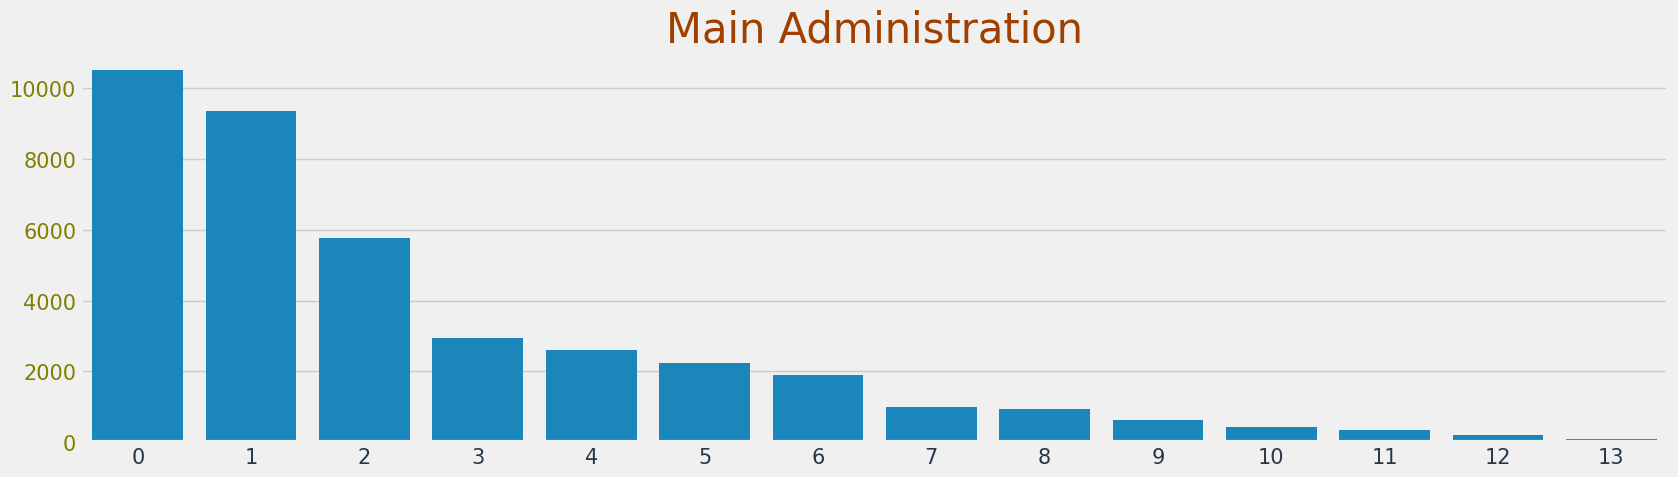

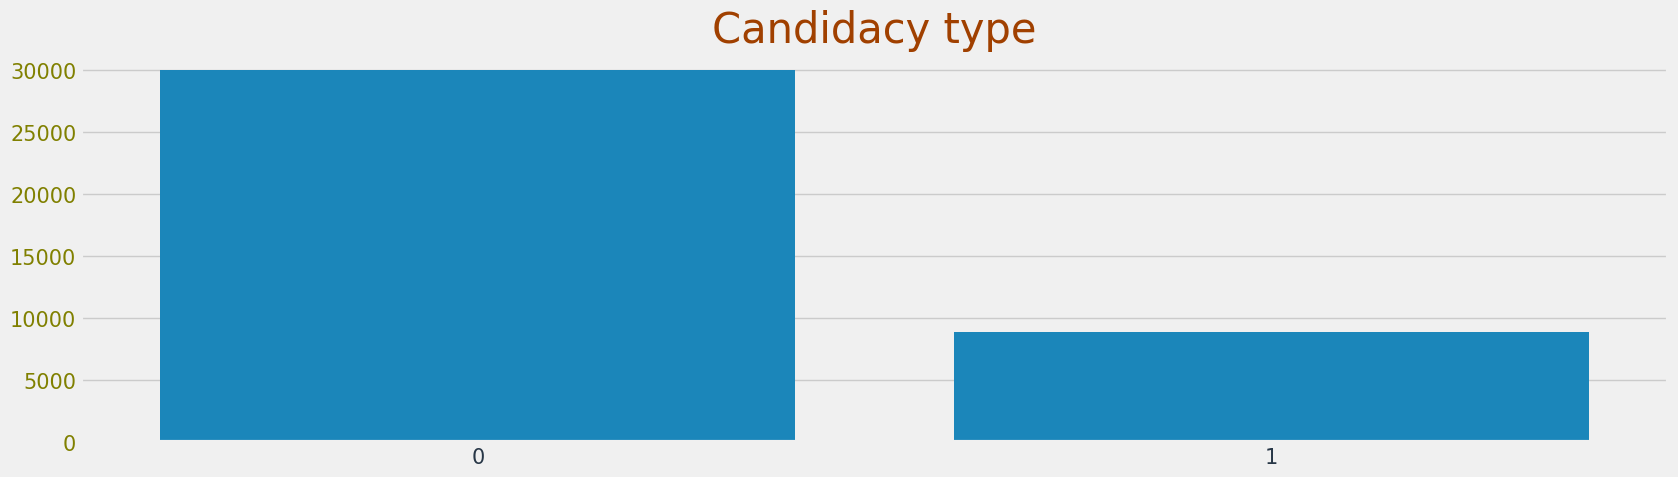

In [11]:
for col in category_cols:
    plt.figure(figsize=(17,5))
    sns.barplot(df[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()
    plt.show();
    
plt.show();

### Function to generate model report and plot auc_roc curve

In [12]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc=4)
    plt.show()
    pass

def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [13]:
df.head()

,Gender,Nationality,Class Level,Age,School Type,Main Administration,Candidacy type,Degree
0,female,Saudi,3,21,Governmental,Riyadh,Self-Candidacy,593
1,male,Saudi,3,20,Governmental,Unknown,Self-Candidacy,600
2,female,Saudi,3,19,Governmental,Aseer,Self-Candidacy,640
3,male,Saudi,3,19,Governmental,Jazan,Self-Candidacy,600
4,female,Saudi,3,19,Governmental,Eastern,Talented-Candidacy,713


# Data Engineering

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38930 entries, 0 to 38929
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               38930 non-null  object
 1   Nationality          38930 non-null  object
 2   Class Level          38930 non-null  int64 
 3   Age                  38930 non-null  int64 
 4   School Type          38930 non-null  object
 5   Main Administration  38930 non-null  object
 6   Candidacy type       38930 non-null  object
 7   Degree               38930 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.4+ MB


In [15]:
df.head()

,Gender,Nationality,Class Level,Age,School Type,Main Administration,Candidacy type,Degree
0,female,Saudi,3,21,Governmental,Riyadh,Self-Candidacy,593
1,male,Saudi,3,20,Governmental,Unknown,Self-Candidacy,600
2,female,Saudi,3,19,Governmental,Aseer,Self-Candidacy,640
3,male,Saudi,3,19,Governmental,Jazan,Self-Candidacy,600
4,female,Saudi,3,19,Governmental,Eastern,Talented-Candidacy,713


In [16]:
df['Degree'].describe()

count    38930.000000
mean       624.936476
std         76.615761
min        167.000000
25%        587.000000
50%        633.000000
75%        680.000000
max        833.000000
Name: Degree, dtype: float64

In [17]:
df['Pass/Fail'] = np.where(df['Degree'] >= 600, 1, 0)

In [18]:
df['Pass/Fail'].value_counts()

Pass/Fail
1    27656
0    11274
Name: count, dtype: int64

In [19]:
df = df.drop(['Degree'], axis = 1)

In [20]:
df.head()

,Gender,Nationality,Class Level,Age,School Type,Main Administration,Candidacy type,Pass/Fail
0,female,Saudi,3,21,Governmental,Riyadh,Self-Candidacy,0
1,male,Saudi,3,20,Governmental,Unknown,Self-Candidacy,1
2,female,Saudi,3,19,Governmental,Aseer,Self-Candidacy,1
3,male,Saudi,3,19,Governmental,Jazan,Self-Candidacy,1
4,female,Saudi,3,19,Governmental,Eastern,Talented-Candidacy,1


In [21]:
df['Class Level'] = df['Class Level'].astype('object')

In [22]:
df['School Type'].value_counts()

School Type
Governmental    29537
Private          8731
Foreign           662
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df['School Type'] = lbe.fit_transform(df['School Type'])

In [24]:
df['Main Administration'].value_counts()
df['Main Administration'] = lbe.fit_transform(df['Main Administration'])

Main Administration
Mecca                10526
Eastern               9364
Riyadh                5771
Aseer                 2931
Jazan                 2596
Madinah               2236
Qaseem                1910
Tabuk                  985
Bahah                  923
Jawf                   632
Hudud-Shimaliyyah      426
Hail                   339
Najran                 191
Unknown                100
Name: count, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38930 entries, 0 to 38929
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               38930 non-null  object
 1   Nationality          38930 non-null  object
 2   Class Level          38930 non-null  object
 3   Age                  38930 non-null  int64 
 4   School Type          38930 non-null  int64 
 5   Main Administration  38930 non-null  int64 
 6   Candidacy type       38930 non-null  object
 7   Pass/Fail            38930 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 2.4+ MB


In [26]:
df = df.sample(frac = 1.0)

In [27]:
X = df.drop(['Pass/Fail'], axis = 1)
y = df['Pass/Fail']

In [28]:
X = pd.get_dummies(X)
X.head()

,Age,School Type,Main Administration,Gender_female,Gender_male,Nationality_Non-Saudi,Nationality_Saudi,Class Level_1,Class Level_2,Class Level_3,Candidacy type_Self-Candidacy,Candidacy type_Talented-Candidacy
19460,14,1,10,True,False,False,True,False,True,False,True,False
19338,14,1,8,True,False,False,True,False,True,False,False,True
11062,17,1,2,True,False,False,True,False,False,True,False,True
35831,11,1,10,True,False,False,True,True,False,False,True,False
19125,14,1,4,True,False,False,True,False,True,False,False,True


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
ss = MinMaxScaler(feature_range=(0,1))
X['Age'] = ss.fit_transform(np.array(X['Age']).reshape(-1, 1))

In [30]:
finalDF = pd.concat([X,y],axis = 1)
finalDF.to_csv('finalDf_v2.csv', index = False)

In [31]:
X

,Age,School Type,Main Administration,Gender_female,Gender_male,Nationality_Non-Saudi,Nationality_Saudi,Class Level_1,Class Level_2,Class Level_3,Candidacy type_Self-Candidacy,Candidacy type_Talented-Candidacy
19460,0.363636,1,10,True,False,False,True,False,True,False,True,False
19338,0.363636,1,8,True,False,False,True,False,True,False,False,True
11062,0.636364,1,2,True,False,False,True,False,False,True,False,True
35831,0.090909,1,10,True,False,False,True,True,False,False,True,False
19125,0.363636,1,4,True,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5589,0.636364,1,7,True,False,False,True,False,False,True,True,False
401,0.727273,1,8,True,False,False,True,False,False,True,True,False
10059,0.545455,2,11,False,True,False,True,False,False,True,True,False
3296,0.636364,1,2,True,False,False,True,False,False,True,False,True
